# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | nuku'alofa
Processing Record 3 of Set 1 | narasannapeta
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | walvis bay
Processing Record 9 of Set 1 | severo-yeniseyskiy
Processing Record 10 of Set 1 | kulia village
City not found. Skipping...
Processing Record 11 of Set 1 | yabelo
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | bela
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | ambatofinandrahana
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | vershino-darasunskiy
Processing Record 21 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,278.02,95,20,1.54,GB,1711593577
1,nuku'alofa,-21.1333,-175.2000,300.34,94,100,4.12,TO,1711593441
2,narasannapeta,18.4167,84.0500,302.78,60,2,3.17,IN,1711593578
3,edinburgh of the seven seas,-37.0676,-12.3116,292.93,88,100,12.16,SH,1711593578
4,port-aux-francais,-49.3500,70.2167,279.17,87,100,12.82,TF,1711593322


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,278.02,95,20,1.54,GB,1711593577
1,nuku'alofa,-21.1333,-175.2000,300.34,94,100,4.12,TO,1711593441
2,narasannapeta,18.4167,84.0500,302.78,60,2,3.17,IN,1711593578
3,edinburgh of the seven seas,-37.0676,-12.3116,292.93,88,100,12.16,SH,1711593578
4,port-aux-francais,-49.3500,70.2167,279.17,87,100,12.82,TF,1711593322


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

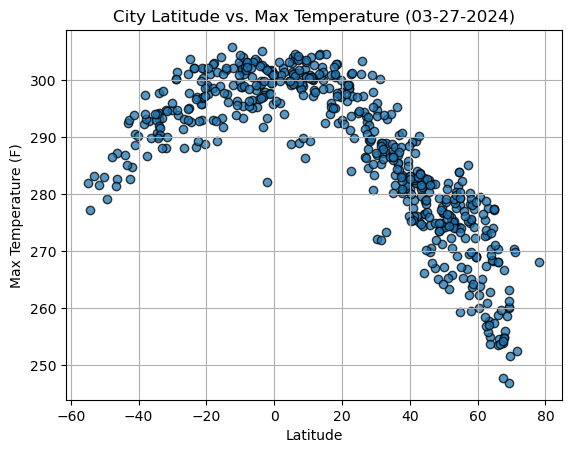

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

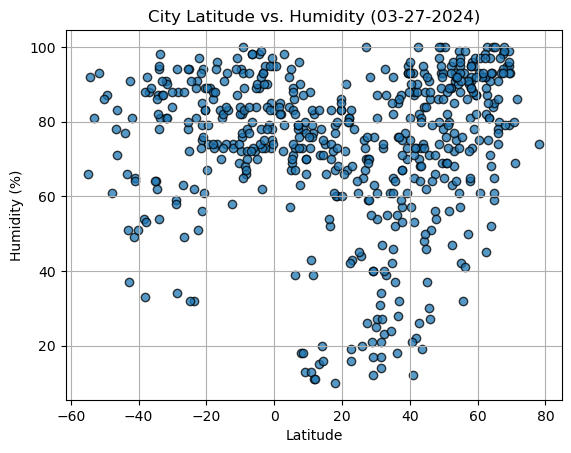

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

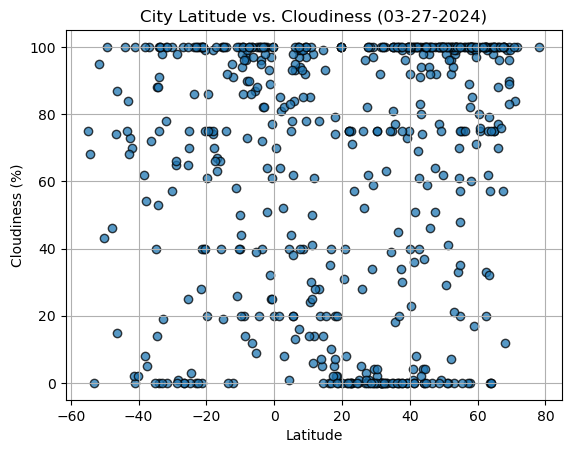

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

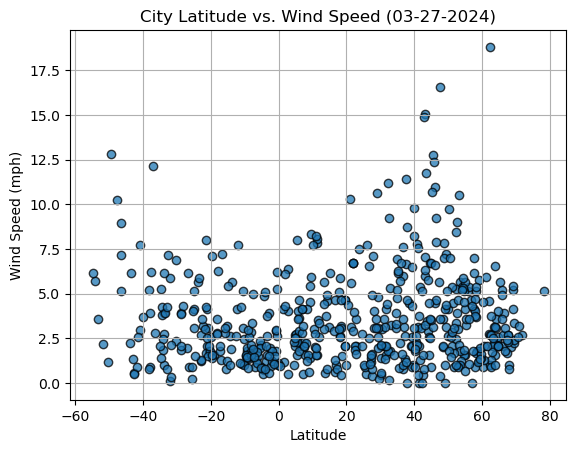

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03-27-2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,278.02,95,20,1.54,GB,1711593577
2,narasannapeta,18.4167,84.0500,302.78,60,2,3.17,IN,1711593578
5,iqaluit,63.7506,-68.5145,255.00,71,0,1.54,CA,1711593578
8,severo-yeniseyskiy,60.3725,93.0408,262.36,93,80,0.89,RU,1711593578
9,yabelo,4.8833,38.0833,288.86,67,44,2.70,ET,1711593578


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nuku'alofa,-21.1333,-175.2000,300.34,94,100,4.12,TO,1711593441
3,edinburgh of the seven seas,-37.0676,-12.3116,292.93,88,100,12.16,SH,1711593578
4,port-aux-francais,-49.3500,70.2167,279.17,87,100,12.82,TF,1711593322
6,adamstown,-25.0660,-130.1015,297.84,72,70,5.14,PN,1711593578
7,walvis bay,-22.9575,14.5053,288.20,81,0,2.69,NaN,1711593389


###  Temperature vs. Latitude Linear Regression Plot

In [22]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Latitude", "Max Temperature (F)", 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Northern")

NameError: name 'plot_linear_regression' is not defined

In [23]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Latitude", "Max Temperature (F)", 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Southern")

NameError: name 'plot_linear_regression' is not defined

**Discussion about the linear relationship:** Shows the correlation between maximum temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

Text(0.5133, 10, 'R-squared: 0.09')

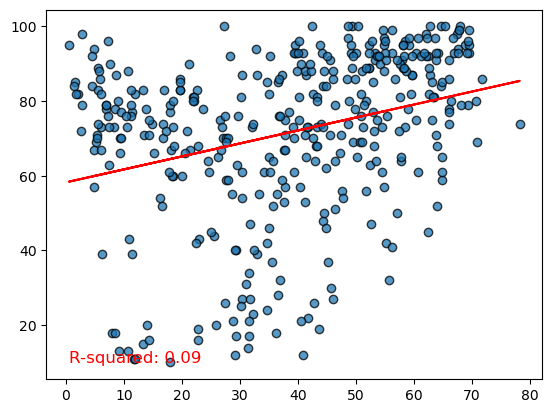

In [26]:
# Northern Hemisphere
humidity = northern_hemi_df["Humidity"]
latitude = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
plt.scatter(latitude, humidity, marker="o", edgecolors="black", alpha=0.75)
plt.plot(latitude, regress_values, "r-", label="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

The r-value is: 0.0002808747046324607


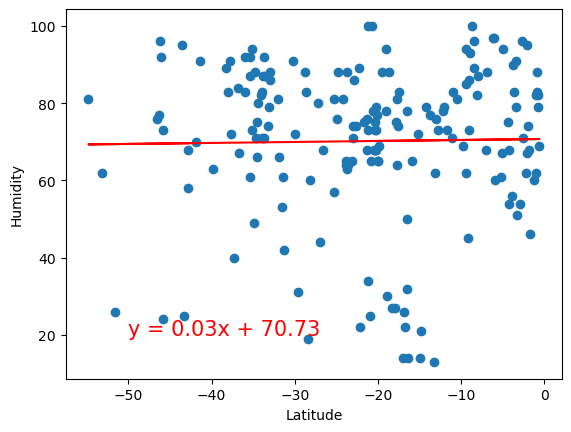

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


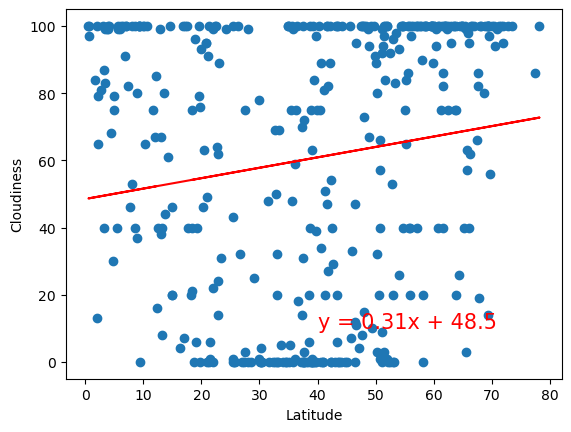

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


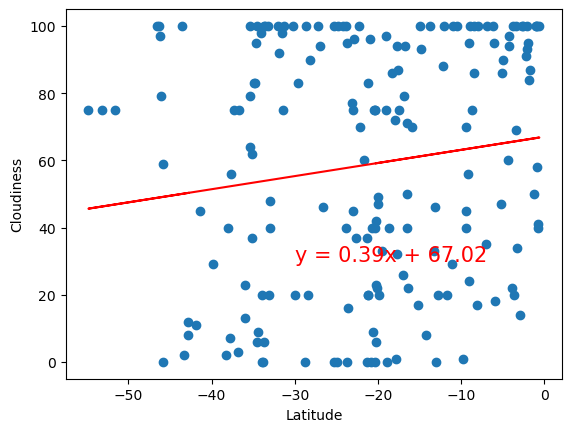

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


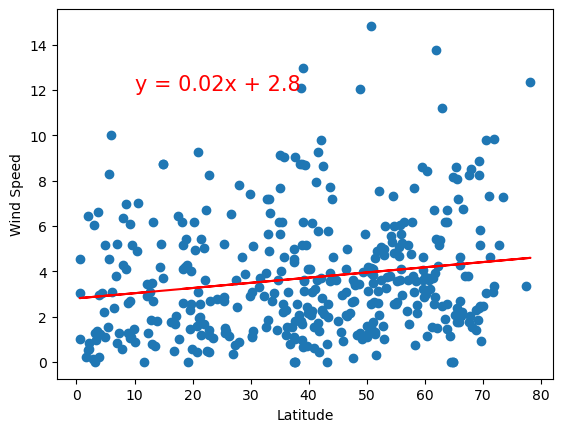

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


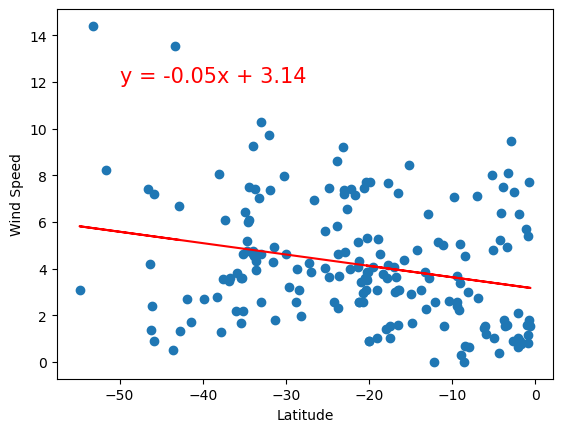

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE